In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
from nltk.corpus import stopwords

stopw = stopwords.words('english')
stopw.extend(list(string.ascii_lowercase))
stopw.extend(['0','1','2','3','4','5','6','7','8','9'])
punctuation = string.punctuation + '1234567890Â©á»áº¯ÄÃ' + '¢`~¡¢£¤¥¦§¨©ª«¬®¯°±²³´µ¶·¸¹º»¼½¾¿×÷¢£¤¥¦§©´µ¶·¸¹º€£¥₹₽₿₣₱₩₨₫₮₭₣₢₥₦₠₡₧₤₮₯₰₲₱₴₵₸₹₺₻₼₽₿'

def my_review_filter(review):
    stopwords_lower = set(stopw)
    cleaned_review = (''.join(ch for ch in review if ch not in punctuation)).lower()
    filtered_words = [word for word in cleaned_review.split() if word not in stopwords_lower]
    return filtered_words

train = pd.read_csv('../Dataset/train.csv')

In [3]:
vector =cv(analyzer=my_review_filter, dtype=np.uint8)
X_train = vector.fit_transform(train['Review'])
y_train = train['Sentiment']
X_train.shape

(12000, 10812)

In [4]:
print(list(vector.vocabulary_.keys())[:10])

['gud', 'product', 'value', 'money', 'good', 'like', 'top', 'quality', 'easy', 'beginner']


In [6]:
test=pd.read_csv(r'../Dataset/test.csv')
X_test= vector.transform(test['Review'])
y_test=test['Sentiment']

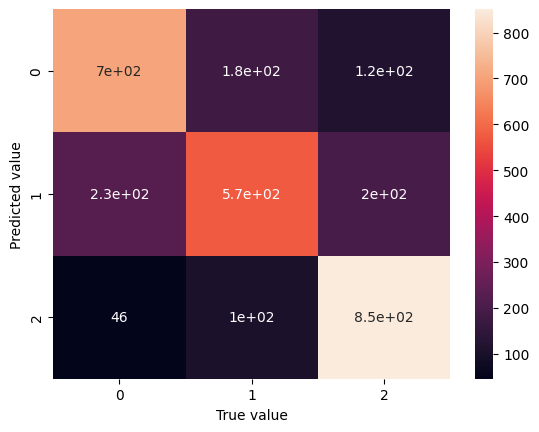

              precision    recall  f1-score   support

          -1       0.72      0.70      0.71      1000
           0       0.67      0.57      0.62      1000
           1       0.73      0.85      0.79      1000

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.71      0.71      0.71      3000



In [7]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

print(classification_report(y_test, y_predict_test))

In [8]:
def get_confidence_scores(X):
    confidence_scores = NB_classifier.predict_proba(X)
    return confidence_scores

In [22]:
l = ['good quality','ok', 'awsome product', 'dont buy this']
X_input = vector.transform(l)
res = NB_classifier.predict(X_input)
confidence_scores = get_confidence_scores(X_input)

for i in range(len(l)):
    print(f"The predicted value for {l[i]} is: ", end="")
    n = res[i]
    if n == 1:
        print(f'POSITIVE (confidence: {100*confidence_scores[i][2]:.2f})')
    elif n == 0:
        print(f'Neutral (confidence: {100*confidence_scores[i][1]:.2f})')
    else:
        print(f'NEGATIVE (confidence: {100*confidence_scores[i][0]:.2f})')


The predicted value for good quality is: POSITIVE (confidence: 45.01)
The predicted value for ok is: Neutral (confidence: 72.16)
The predicted value for awsome product is: POSITIVE (confidence: 72.44)
The predicted value for dont buy this is: NEGATIVE (confidence: 88.11)


In [23]:
print(res)
print(confidence_scores)

[ 1  0  1 -1]
[[0.21510299 0.33477728 0.45011973]
 [0.13780343 0.72163254 0.14056403]
 [0.11654798 0.15904542 0.7244066 ]
 [0.88105569 0.05847777 0.06046654]]
